# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [4]:
df = pd.read_csv("World military power.csv", header=1)
#df = pd.read_csv("World military power.csv")

# EDA

## Implement basic steps to see how is your data looks like

In [5]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"


In [6]:
df.describe()

,Military Strength Power Index,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Attack Helicopter Fleet Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
count,138.000000,138.000000,138.000000,138.000000,124.000000,115.000000,115.000000,115.000000,115.000000
mean,1.460716,25.760870,30.231884,25.623188,84.983871,0.382609,4.800000,2.052174,3.521739
std,1.324018,94.528222,92.330436,97.326091,146.114165,1.971653,13.706958,10.000740,6.481211
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.574800,0.000000,3.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,1.034100,0.000000,9.000000,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000
75%,2.021525,15.750000,26.000000,17.750000,77.750000,0.000000,4.000000,0.000000,5.500000
max,10.168100,742.000000,945.000000,967.000000,984.000000,20.000000,83.000000,91.000000,52.000000


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    object 
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    object 
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [8]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

In [9]:
df.duplicated().sum()

0

## Convert multi index columns to one level

In [10]:
df

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,"28,748",Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,"6,734"
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600",Angola,"1,300",Angola,"5,369"
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989",Argentina,"11,000",Argentina,"11,968"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,"2,800",Venezuela,"7,100",Venezuela,"5,267"
134,Vietnam,0.3559,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,"3,444",Vietnam,"17,702",Vietnam,"4,616"
135,Yemen,1.2412,Yemen,169,Yemen,77,Yemen,0,Yemen,8,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,"1,906",Yemen,0,Yemen,"1,601"
136,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,"2,250",Zambia,"6,043"


In [11]:
df.set_index("Military Strength", inplace= True)


## Detect and drop duplicated columns

In [12]:
df.columns

Index(['Military Strength Power Index', 'Aircraft Strength',
       'Aircraft Strength value', 'Fighter/Interceptor Strength',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength',
       'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',
       'Aircraft Carrier Fle

In [13]:
df.head(1)

,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
Military Strength,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,"1,200",Afghanistan,"5,987"


In [14]:
drop_list1 =['Aircraft Strength',
            'Fighter/Interceptor Strength', 
            'Attack Aircraft Strength', 
           'Transport Aircraft Fleet Strength',
           'Trainer Aircraft Fleet',
           'Helicopter Fleet Strength',
           'Attack Helicopter Fleet Strength',
           'Tank Strength',
           'AFV/APC Strength', 
           'Self-Propelled Artillery Strength',
           'Towed Artillery Strength',
           'Rocket Projector Strength',
           'Navy Fleet Strengths',
           'Aircraft Carrier Fleet Strength',
           'Submarine Fleet Strength',
           'Destroyer Fleet Strength',
           'Frigate Fleet Strength',
           'defense spending budget',
           'External Debt', 
           'Airport Totals', 
           'Oil Production',
           'Oil Consumption', 
           'Proven Oil Reserves', 
           'Available Manpower',
           'Total Population',
           'Total Square Land Area',
           'Total Coastline Coverage',
           'Total Waterway Coverage',
           'Total Border Coverage']

df.drop(drop_list1, axis=1, inplace=True)

In [15]:
len(drop_list1)

29

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df1 = df

## Check for missing values 

In [18]:
df1.isnull().sum()

Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value                        0
Oil Production value              

In [19]:
df1.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       '

In [20]:
df1[["Total Coastline Coverage value","Navy Fleet Strengths value", "Aircraft Carrier Fleet Strength value","Submarine Fleet Strength value","Destroyer Fleet Strength value","Frigate Fleet Strength value"]]# nan olan ülkelerin denize kıyı yok navy unsurlarıda yok 

,Total Coastline Coverage value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
Military Strength,,,,,,
Afghanistan,0,0.0,0.0,0.0,0.0,0.0
Albania,362,38.0,0.0,0.0,0.0,0.0
Algeria,998,201.0,0.0,6.0,0.0,5.0
Angola,"1,600",57.0,0.0,0.0,0.0,0.0
Argentina,"4,989",49.0,0.0,2.0,4.0,0.0
Armenia,NaN,0.0,NaN,NaN,NaN,NaN
Australia,"25,760",48.0,2.0,6.0,2.0,8.0
Austria,NaN,0.0,NaN,NaN,NaN,NaN
Azerbaijan,713,31.0,0.0,4.0,0.0,1.0


## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [21]:
df1["Total Coastline Coverage value"].fillna( "0" , inplace = True)

In [22]:
df1["Total Coastline Coverage value"]

Military Strength
Afghanistan                                0
Albania                                  362
Algeria                                  998
Angola                                 1,600
Argentina                              4,989
Armenia                                    0
Australia                             25,760
Austria                                    0
Azerbaijan                               713
Bahrain                                  161
Bangladesh                               580
Belarus                                    0
Belgium                                   67
Bhutan                                     0
Bolivia                                    0
Bosnia and Herzegovina                    20
Botswana                                   0
Brazil                                 7,491
Bulgaria                                 354
Burkina Faso                               0
Cambodia                                 443
Cameroon                             

In [23]:
df1["Navy Fleet Strengths value"].fillna( "0" , inplace = True)

In [24]:
df1["Total Coastline Coverage value"].fillna( "0" , inplace = True)

In [25]:
df1["Aircraft Carrier Fleet Strength value"].fillna( "0" , inplace = True)

In [26]:
df1["Submarine Fleet Strength value"].fillna( "0" , inplace = True)

In [27]:
df1["Destroyer Fleet Strength value"].fillna( "0" , inplace = True)

In [28]:
df1["Frigate Fleet Strength value"].fillna( "0" , inplace = True)

In [29]:
coastline = df["Total Coastline Coverage value"]
coastline

Military Strength
Afghanistan                                0
Albania                                  362
Algeria                                  998
Angola                                 1,600
Argentina                              4,989
Armenia                                    0
Australia                             25,760
Austria                                    0
Azerbaijan                               713
Bahrain                                  161
Bangladesh                               580
Belarus                                    0
Belgium                                   67
Bhutan                                     0
Bolivia                                    0
Bosnia and Herzegovina                    20
Botswana                                   0
Brazil                                 7,491
Bulgaria                                 354
Burkina Faso                               0
Cambodia                                 443
Cameroon                             

In [30]:
df1["Total Border Coverage value"].fillna(coastline, inplace=True)  # ada ülkelerin sınır uzunluğunu coastline olarak verdik 

In [31]:
df1.isnull().sum()

Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Consum

In [32]:
df1

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Military Strength,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,"1,062",0,176,50,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43,0,"5,500",0,"1,43,25,743","3,49,40,837","6,52,230",0,"1,200","5,987"
Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4,"16,000","42,500","16,83,00,000","15,19,438","30,57,220","28,748",362,41,691
Algeria,0.4659,551,103,22,59,87,257,45,880,"7,361",320,240,316,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,"6,734"
Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000","82,300","8,27,30,00,000","62,44,205","3,03,55,880","12,46,700","1,600","1,300","5,369"
Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000","1,138","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400","4,989","11,000","11,968"
Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0,0,0,0,"1,38,50,00,000","10,41,00,00,000",11,0,"47,500",0,"16,96,085","30,38,217","29,743",0,0,"1,570"
Australia,0.3225,464,82,6,38,174,133,22,59,"3,051",0,54,0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220","25,760","2,000","25,760"
Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0,0,0,0,"3,38,00,00,000","6,30,80,00,00,000",52,"14,260","2,15,000","4,30,00,000","40,17,691","87,93,370","83,871",0,0,"2,524"
Azerbaijan,0.9463,147,17,12,1,29,88,17,570,"1,451",187,227,162,31.0,0.0,4.0,0.0,1.0,"2,80,50,00,000","17,41,00,00,000",37,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516","86,600",713,0,"2,468"


In [33]:
miss_val = []

[miss_val.append(i) for i in df1.columns if any(df1[i].isnull())]

miss_val

[]

## Fix the dtypes

In [34]:
df1["Military Strength Power Index"] = df1["Military Strength Power Index"].astype("object")      

In [35]:
df1['Aircraft Strength value']= df1['Aircraft Strength value'].str[0:].str.strip('\n').str.replace(',','').astype("object")   

In [36]:
df1['Fighter/Interceptor Strength value']=df1['Fighter/Interceptor Strength value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [37]:
df1['Attack Aircraft Strength value']=df1['Attack Aircraft Strength value'].astype("object")

In [38]:
df1['Transport Aircraft Fleet Strength value']=df1['Transport Aircraft Fleet Strength value'].astype("object")

In [39]:
df1['Trainer Aircraft Fleet value']=df1['Trainer Aircraft Fleet value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [40]:
df1['Helicopter Fleet Strength value']= df1['Helicopter Fleet Strength value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [41]:
df1['Attack Helicopter Fleet Strength value']=df1['Attack Helicopter Fleet Strength value'].astype("object")

In [42]:
df1['Tank Strength value']=df1['Tank Strength value'].str.strip('\n').str[0:].str.strip('\n').str.replace(',','').astype("object")

In [43]:
df1['AFV/APC Strength value']=df1['AFV/APC Strength value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [44]:
df1['Self-Propelled Artillery Strength value']=df1['Self-Propelled Artillery Strength value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [45]:
df1['Towed Artillery Strength value' ]=df1['Towed Artillery Strength value' ].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [46]:
df1['Rocket Projector Strength value']=df1['Rocket Projector Strength value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [47]:
df1['Navy Fleet Strengths value']

Military Strength
Afghanistan                           0.0
Albania                              38.0
Algeria                             201.0
Angola                               57.0
Argentina                            49.0
Armenia                               0.0
Australia                            48.0
Austria                               0.0
Azerbaijan                           31.0
Bahrain                              39.0
Bangladesh                          112.0
Belarus                               0.0
Belgium                              17.0
Bhutan                                0.0
Bolivia                             173.0
Bosnia and Herzegovina                0.0
Botswana                                0
Brazil                              112.0
Bulgaria                             29.0
Burkina Faso                            0
Cambodia                             27.0
Cameroon                             64.0
Canada                               64.0
Central African 

In [48]:
df1['Aircraft Carrier Fleet Strength value']

Military Strength
Afghanistan                          0.0
Albania                              0.0
Algeria                              0.0
Angola                               0.0
Argentina                            0.0
Armenia                                0
Australia                            2.0
Austria                                0
Azerbaijan                           0.0
Bahrain                              0.0
Bangladesh                           0.0
Belarus                                0
Belgium                              0.0
Bhutan                                 0
Bolivia                              0.0
Bosnia and Herzegovina               0.0
Botswana                               0
Brazil                               0.0
Bulgaria                             0.0
Burkina Faso                           0
Cambodia                             0.0
Cameroon                             0.0
Canada                               0.0
Central African Republic               

In [49]:
df1['Submarine Fleet Strength value']

Military Strength
Afghanistan                          0.0
Albania                              0.0
Algeria                              6.0
Angola                               0.0
Argentina                            2.0
Armenia                                0
Australia                            6.0
Austria                                0
Azerbaijan                           4.0
Bahrain                              0.0
Bangladesh                           2.0
Belarus                                0
Belgium                              0.0
Bhutan                                 0
Bolivia                              0.0
Bosnia and Herzegovina               0.0
Botswana                               0
Brazil                               6.0
Bulgaria                             0.0
Burkina Faso                           0
Cambodia                             0.0
Cameroon                             0.0
Canada                               4.0
Central African Republic               

In [50]:
df1['defense spending budget value']=df1['defense spending budget value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [51]:
df1['External Debt value']=df1['External Debt value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [52]:
df1['Airport Totals value']=df1['Airport Totals value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [53]:
df1['Oil Production value']=df1['Oil Production value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [54]:
df1["Oil Consumption value"]=df1["Oil Consumption value"].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [55]:
df1['Proven Oil Reserves value']= df1['Proven Oil Reserves value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [56]:
df1['Available Manpower value']=df1['Available Manpower value'].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [57]:
df1["Total Square Land Area value"]=df1["Total Square Land Area value"].str[0:].str.strip('\n').str.replace(',','').astype("object")

In [58]:
df1

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Military Strength,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,"3,49,40,837",652230,0,"1,200","5,987"
Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,"30,57,220",28748,362,41,691
Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,"4,16,57,488",2381741,998,0,"6,734"
Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,"3,03,55,880",1246700,"1,600","1,300","5,369"
Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,"4,46,94,198",2780400,"4,989","11,000","11,968"
Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0,0,0,0,1385000000,10410000000,11,0,47500,0,1696085,"30,38,217",29743,0,0,"1,570"
Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,"2,34,70,145",7741220,"25,760","2,000","25,760"
Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0,0,0,0,3380000000,630800000000,52,14260,215000,43000000,4017691,"87,93,370",83871,0,0,"2,524"
Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,2805000000,17410000000,37,789300,180000,7000000000,5042346,"1,00,46,516",86600,713,0,"2,468"


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength Power Index            138 non-null    object
 1   Aircraft Strength value                  138 non-null    object
 2   Fighter/Interceptor Strength value       138 non-null    object
 3   Attack Aircraft Strength value           138 non-null    object
 4   Transport Aircraft Fleet Strength value  138 non-null    object
 5   Trainer Aircraft Fleet value             138 non-null    object
 6   Helicopter Fleet Strength value          138 non-null    object
 7   Attack Helicopter Fleet Strength value   138 non-null    object
 8   Tank Strength value                      138 non-null    object
 9   AFV/APC Strength value                   138 non-null    object
 10  Self-Propelled Artillery Strength value  138 non-nul

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [60]:
df1.head(10)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Military Strength,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,"3,49,40,837",652230,0,"1,200","5,987"
Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,"30,57,220",28748,362,41,691
Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,"4,16,57,488",2381741,998,0,"6,734"
Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,"3,03,55,880",1246700,"1,600","1,300","5,369"
Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,"4,46,94,198",2780400,"4,989","11,000","11,968"
Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0,0,0,0,1385000000,10410000000,11,0,47500,0,1696085,"30,38,217",29743,0,0,"1,570"
Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,"2,34,70,145",7741220,"25,760","2,000","25,760"
Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0,0,0,0,3380000000,630800000000,52,14260,215000,43000000,4017691,"87,93,370",83871,0,0,"2,524"
Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,2805000000,17410000000,37,789300,180000,7000000000,5042346,"1,00,46,516",86600,713,0,"2,468"


Askeri güç',
 'Askeri Güç Güç Endeksi',
       'Uçak Gücü değeri',
'Savaşçı/Önleyici Gücü değeri',
       'Saldırı Uçağı Gücü değeri',
       'Taşıma Uçağı Filo Mukavemet değeri',
       'Eğitim Uçak Filosu değeri',
'Helikopter Filo Mukavemet değeri',
       'Saldırı Helikopteri Filo Gücü değeri',
'Tank Gücü değeri',
       'AFV/APC Güç değeri',
 'Kendinden Tahrikli Topçu Mukavemet değeri',
       'Çekilmiş Topçu Gücü değeri',
'Roket Projektör Gücü değeri',
       'Donanma Filosunun Güç Değeri',
 'Uçak Gemisi Filo Gücü değeri',
       'Denizaltı Filo Mukavemet değeri',
'Yok Edici Filo Gücü değeri',
       'Fırkateyn Filo Mukavemet değeri',
 'savunma harcaması bütçe değeri',
       'Dış Borç değeri',
Havalimanı Toplamları değeri',
 'Petrol Üretim değeri',
       'Yağ Tüketim değeri', '
Kanıtlanmış Petrol Rezervi değeri',
       'Mevcut İnsan Gücü değeri',
'Toplam Nüfus değeri',
       'Toplam Kare Arsa Alanı değeri',
'Toplam Sahil Kapsamı değeri',
       'Toplam Su Yolu Kapsama değeri', '
Toplam Sınır Kapsama değeri'

In [61]:
df1.drop(["Total Coastline Coverage value","Total Waterway Coverage value","Total Border Coverage value","Total Population value"],axis=1, inplace=True)

## Visualy inspect the some features

In [62]:
df1

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Square Land Area value
Military Strength,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,652230
Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,28748
Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,2381741
Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,1246700
Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,2780400
Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0,0,0,0,1385000000,10410000000,11,0,47500,0,1696085,29743
Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,7741220
Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0,0,0,0,3380000000,630800000000,52,14260,215000,43000000,4017691,83871
Azerbaijan,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,2805000000,17410000000,37,789300,180000,7000000000,5042346,86600


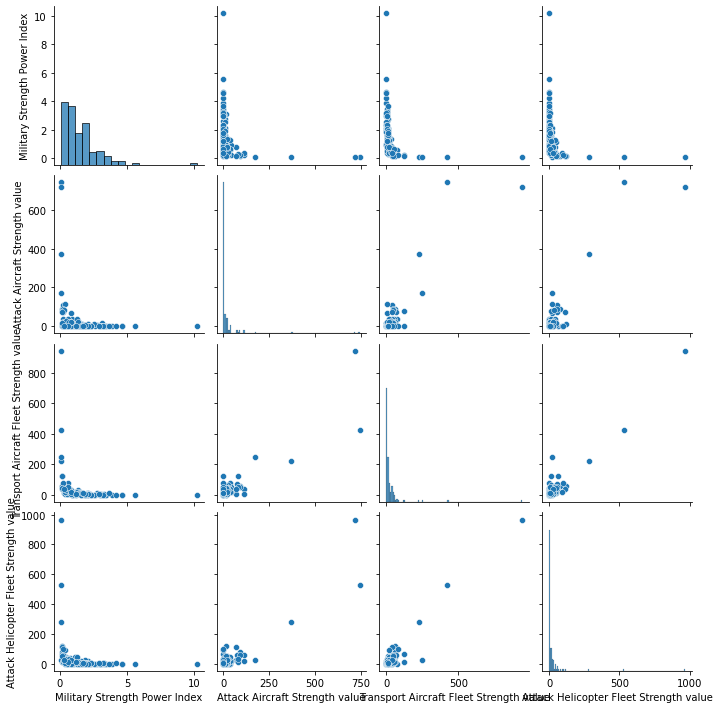

In [63]:
sns.pairplot(df);

## Decriptive statistics

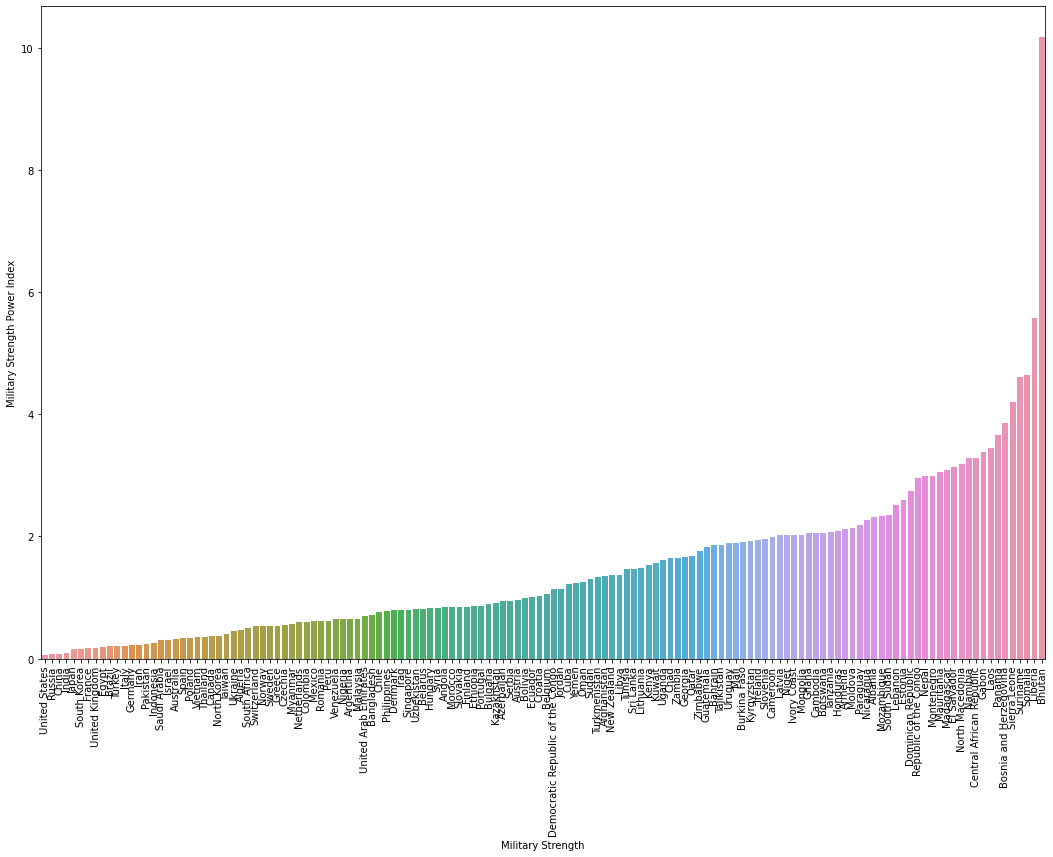

In [64]:
plt.figure(figsize = (18,12))
sns.barplot(y = df1["Military Strength Power Index"].sort_values(), x = df["Military Strength Power Index"].sort_values().index)
plt.xticks(rotation = 90);

In [92]:
#df1.to_csv("militaryPower_eda.csv")

# Data Preprocessing

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_std= StandardScaler() 
scaler_minmax= MinMaxScaler()

In [70]:
scaler_std.fit(df1)

StandardScaler()

In [73]:
df1_sc_std = scaler.transform(df1)
df1_sc_std

array([[-0.08817076, -0.10465985, -0.35542142, ..., -0.28040649,
        -0.13203321, -0.13639038],
       [ 0.64658594, -0.30099225, -0.35542142, ..., -0.27645539,
        -0.28412667, -0.41755575],
       [-0.75409851,  0.13240542,  0.09340232, ...,  0.00600721,
        -0.05583959,  0.64354968],
       ...,
       [-0.16639927, -0.17879366, -0.01989299, ..., -0.20997689,
        -0.16836947, -0.19242756],
       [ 0.14075375, -0.22848776, -0.2769862 , ..., -0.28040649,
        -0.22893125, -0.09111942],
       [ 0.22512228, -0.24315159, -0.3118463 , ..., -0.28040649,
        -0.23585307, -0.25430421]])

In [71]:
scaler_minmax.fit(df1)

MinMaxScaler()

In [75]:
scaler_minmax = scaler.transform(df1)
scaler_minmax

array([[-0.08817076, -0.10465985, -0.35542142, ..., -0.28040649,
        -0.13203321, -0.13639038],
       [ 0.64658594, -0.30099225, -0.35542142, ..., -0.27645539,
        -0.28412667, -0.41755575],
       [-0.75409851,  0.13240542,  0.09340232, ...,  0.00600721,
        -0.05583959,  0.64354968],
       ...,
       [-0.16639927, -0.17879366, -0.01989299, ..., -0.20997689,
        -0.16836947, -0.19242756],
       [ 0.14075375, -0.22848776, -0.2769862 , ..., -0.28040649,
        -0.22893125, -0.09111942],
       [ 0.22512228, -0.24315159, -0.3118463 , ..., -0.28040649,
        -0.23585307, -0.25430421]])

In [74]:
MinMaxScaler

sklearn.preprocessing._data.MinMaxScaler

# Modelling

In [67]:
from pyclustertend import hopkins

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [76]:
hopkins(df1_sc_std, df1_scaled.shape[0])

0.07772788500265748

In [77]:
hopkins(scaler_minmax, df1_scaled.shape[0])

0.07811348950457801

In [82]:
scaled = scaler_std.fit_transform(df1)

In [83]:
X = pd.DataFrame(scaled, columns=df1.columns)

In [86]:
X.shape

(138, 26)

## Clustering with K-means

In [87]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Square Land Area value
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.136390
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.273410,-0.177362,-0.317815,-0.187480,-0.486280,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.417556
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.888297,-0.177362,0.158908,-0.187480,0.342197,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,0.643550
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.177362,-0.317815,-0.187480,-0.486280,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,0.131692
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.195012,-0.177362,-0.158908,0.251033,-0.486280,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,0.823329


In [88]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [93]:
K_means_model.fit_predict(X) 

array([0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 4, 0,
       0, 3, 3, 0, 0, 0])

In [94]:
X["Classes"] = K_means_model.labels_

In [95]:
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Square Land Area value,Classes
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.136390,0
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.273410,-0.177362,-0.317815,-0.187480,-0.486280,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.417556,0
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.888297,-0.177362,0.158908,-0.187480,0.342197,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,0.643550,3
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.177362,-0.317815,-0.187480,-0.486280,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,0.131692,0
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.195012,-0.177362,-0.158908,0.251033,-0.486280,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,0.823329,0
5,0.503622,-0.264333,-0.355421,-0.177957,-0.296014,-0.291058,-0.225866,-0.057987,-0.355350,-0.322338,-0.254050,-0.303888,-0.184274,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.187999,-0.276596,-0.230888,-0.352511,-0.302886,-0.280406,-0.282029,-0.417107,0
6,-0.862800,0.061530,0.001895,-0.209809,0.084440,0.379972,-0.040643,-0.037363,-0.389126,0.104863,-0.309482,-0.423461,-0.325171,-0.202139,0.935180,0.158908,0.031776,0.839283,0.183492,0.648993,0.157175,-0.194181,0.140208,-0.237656,-0.173811,3.060460,3
7,-0.381982,-0.218712,-0.290059,-0.273513,-0.209053,-0.211868,-0.177631,-0.264231,-0.391112,-0.374463,-0.261344,-0.490720,-0.325171,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.158253,0.060472,-0.196964,-0.343927,-0.225374,-0.279397,-0.254456,-0.392697,0
8,-0.389942,-0.196716,-0.281344,-0.146105,-0.317754,-0.224371,-0.127466,-0.088924,-0.050707,-0.191933,-0.036701,-0.207980,0.010495,-0.323299,-0.177362,0.000000,-0.187480,-0.320585,-0.166826,-0.272793,-0.209375,0.122659,-0.241570,-0.116071,-0.242287,-0.391467,0
9,0.298651,-0.227673,-0.281344,-0.273513,-0.306884,-0.191028,-0.171843,-0.037363,-0.308991,-0.304716,-0.261344,-0.458336,-0.289946,-0.266282,-0.177362,-0.317815,-0.187480,-0.320585,-0.187552,-0.253918,-0.236680,-0.325421,-0.299416,-0.277481,-0.292594,-0.430177,0


### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [96]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

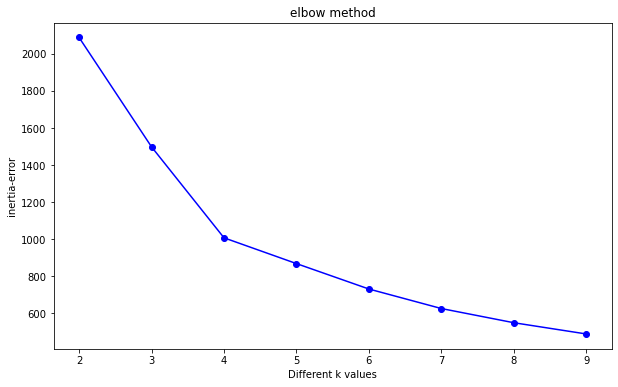

In [97]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [99]:
pd.Series(ssd).diff()

0           NaN
1   -590.222081
2   -490.874334
3   -139.111313
4   -137.223182
5   -105.319316
6    -76.561557
7    -60.652880
dtype: float64

In [100]:
ssd

[2088.3449439749475,
 1498.1228627394046,
 1007.2485286175183,
 868.1372158135933,
 730.9140335015219,
 625.5947177564278,
 549.033160408207,
 488.3802807433299]

In [101]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,590.222081
3,490.874334
4,139.111313
5,137.223182
6,105.319316
7,76.561557
8,60.652880


### Model Building and label visualisation

<AxesSubplot:>

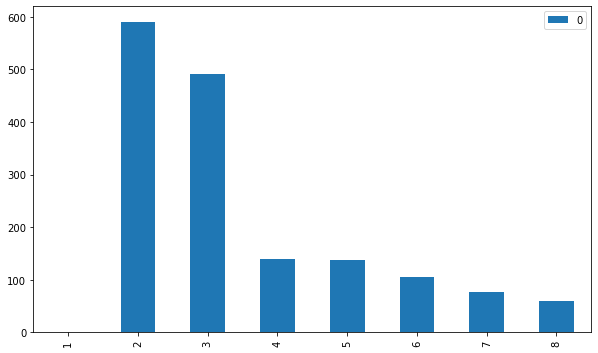

In [102]:
df_diff.plot(kind='bar')

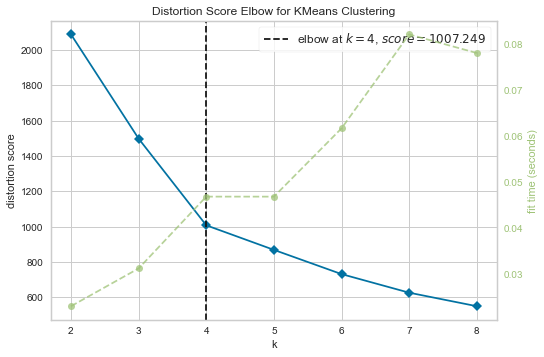

In [103]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Evaluate 

In [122]:
df1.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Military Strength', length=138)

In [111]:
X["country"] = df1.index
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Square Land Area value,Classes,country
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.136390,0,Afghanistan
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.273410,-0.177362,-0.317815,-0.187480,-0.486280,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.417556,0,Albania
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.888297,-0.177362,0.158908,-0.187480,0.342197,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,0.643550,3,Algeria
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.177362,-0.317815,-0.187480,-0.486280,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,0.131692,0,Angola
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.195012,-0.177362,-0.158908,0.251033,-0.486280,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,0.823329,0,Argentina
5,0.503622,-0.264333,-0.355421,-0.177957,-0.296014,-0.291058,-0.225866,-0.057987,-0.355350,-0.322338,-0.254050,-0.303888,-0.184274,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.187999,-0.276596,-0.230888,-0.352511,-0.302886,-0.280406,-0.282029,-0.417107,0,Armenia
6,-0.862800,0.061530,0.001895,-0.209809,0.084440,0.379972,-0.040643,-0.037363,-0.389126,0.104863,-0.309482,-0.423461,-0.325171,-0.202139,0.935180,0.158908,0.031776,0.839283,0.183492,0.648993,0.157175,-0.194181,0.140208,-0.237656,-0.173811,3.060460,3,Australia
7,-0.381982,-0.218712,-0.290059,-0.273513,-0.209053,-0.211868,-0.177631,-0.264231,-0.391112,-0.374463,-0.261344,-0.490720,-0.325171,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.158253,0.060472,-0.196964,-0.343927,-0.225374,-0.279397,-0.254456,-0.392697,0,Austria
8,-0.389942,-0.196716,-0.281344,-0.146105,-0.317754,-0.224371,-0.127466,-0.088924,-0.050707,-0.191933,-0.036701,-0.207980,0.010495,-0.323299,-0.177362,0.000000,-0.187480,-0.320585,-0.166826,-0.272793,-0.209375,0.122659,-0.241570,-0.116071,-0.242287,-0.391467,0,Azerbaijan
9,0.298651,-0.227673,-0.281344,-0.273513,-0.306884,-0.191028,-0.171843,-0.037363,-0.308991,-0.304716,-0.261344,-0.458336,-0.289946,-0.266282,-0.177362,-0.317815,-0.187480,-0.320585,-0.187552,-0.253918,-0.236680,-0.325421,-0.299416,-0.277481,-0.292594,-0.430177,0,Bahrain


In [115]:
X[X.Classes==0]["country"]

0                           Afghanistan
1                               Albania
3                                Angola
4                             Argentina
5                               Armenia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
23             Central African Republic
24                                 Chad
25                                Chile
28                              Croatia
29                                 Cuba
30                              Czechia


In [116]:
X[X.Classes==1]["country"]

26    China
Name: country, dtype: object

In [119]:
X[X.Classes==2]["country"]

101    Russia
Name: country, dtype: object

In [117]:
X[X.Classes==3]["country"]

2                   Algeria
6                 Australia
17                   Brazil
22                   Canada
27                 Colombia
35                    Egypt
40                   France
43                  Germany
45                   Greece
49                    India
50                Indonesia
51                     Iran
52                     Iraq
54                   Israel
55                    Italy
57                    Japan
73                   Mexico
87              North Korea
91                 Pakistan
102            Saudi Arabia
110             South Korea
112                   Spain
118                   Syria
119                  Taiwan
122                Thailand
124                  Turkey
127                 Ukraine
128    United Arab Emirates
129          United Kingdom
133               Venezuela
134                 Vietnam
Name: country, dtype: object

In [118]:
X[X.Classes==4]["country"]

130    United States
Name: country, dtype: object

## Hierarchical Clustering

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [135]:
X = X.drop("Classes",axis =1)

In [136]:
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Square Land Area value
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.136390
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.273410,-0.177362,-0.317815,-0.187480,-0.486280,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.417556
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.888297,-0.177362,0.158908,-0.187480,0.342197,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,0.643550
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.177362,-0.317815,-0.187480,-0.486280,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,0.131692
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.195012,-0.177362,-0.158908,0.251033,-0.486280,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,0.823329
5,0.503622,-0.264333,-0.355421,-0.177957,-0.296014,-0.291058,-0.225866,-0.057987,-0.355350,-0.322338,-0.254050,-0.303888,-0.184274,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.187999,-0.276596,-0.230888,-0.352511,-0.302886,-0.280406,-0.282029,-0.417107
6,-0.862800,0.061530,0.001895,-0.209809,0.084440,0.379972,-0.040643,-0.037363,-0.389126,0.104863,-0.309482,-0.423461,-0.325171,-0.202139,0.935180,0.158908,0.031776,0.839283,0.183492,0.648993,0.157175,-0.194181,0.140208,-0.237656,-0.173811,3.060460
7,-0.381982,-0.218712,-0.290059,-0.273513,-0.209053,-0.211868,-0.177631,-0.264231,-0.391112,-0.374463,-0.261344,-0.490720,-0.325171,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.158253,0.060472,-0.196964,-0.343927,-0.225374,-0.279397,-0.254456,-0.392697
8,-0.389942,-0.196716,-0.281344,-0.146105,-0.317754,-0.224371,-0.127466,-0.088924,-0.050707,-0.191933,-0.036701,-0.207980,0.010495,-0.323299,-0.177362,0.000000,-0.187480,-0.320585,-0.166826,-0.272793,-0.209375,0.122659,-0.241570,-0.116071,-0.242287,-0.391467
9,0.298651,-0.227673,-0.281344,-0.273513,-0.306884,-0.191028,-0.171843,-0.037363,-0.308991,-0.304716,-0.261344,-0.458336,-0.289946,-0.266282,-0.177362,-0.317815,-0.187480,-0.320585,-0.187552,-0.253918,-0.236680,-0.325421,-0.299416,-0.277481,-0.292594,-0.430177


### Dendogram

In [137]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

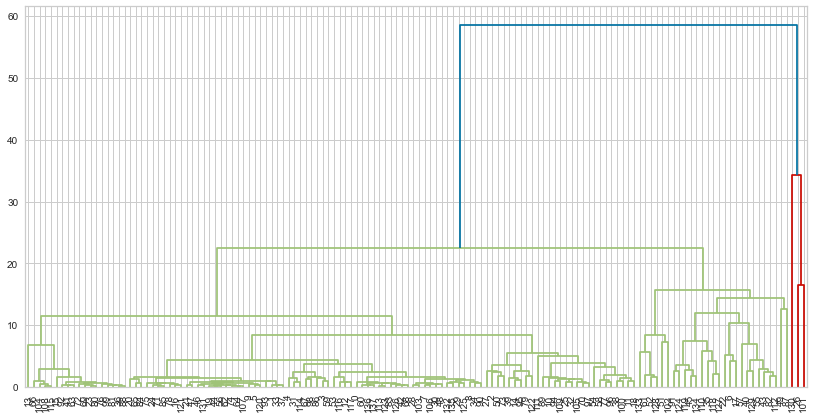

In [138]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

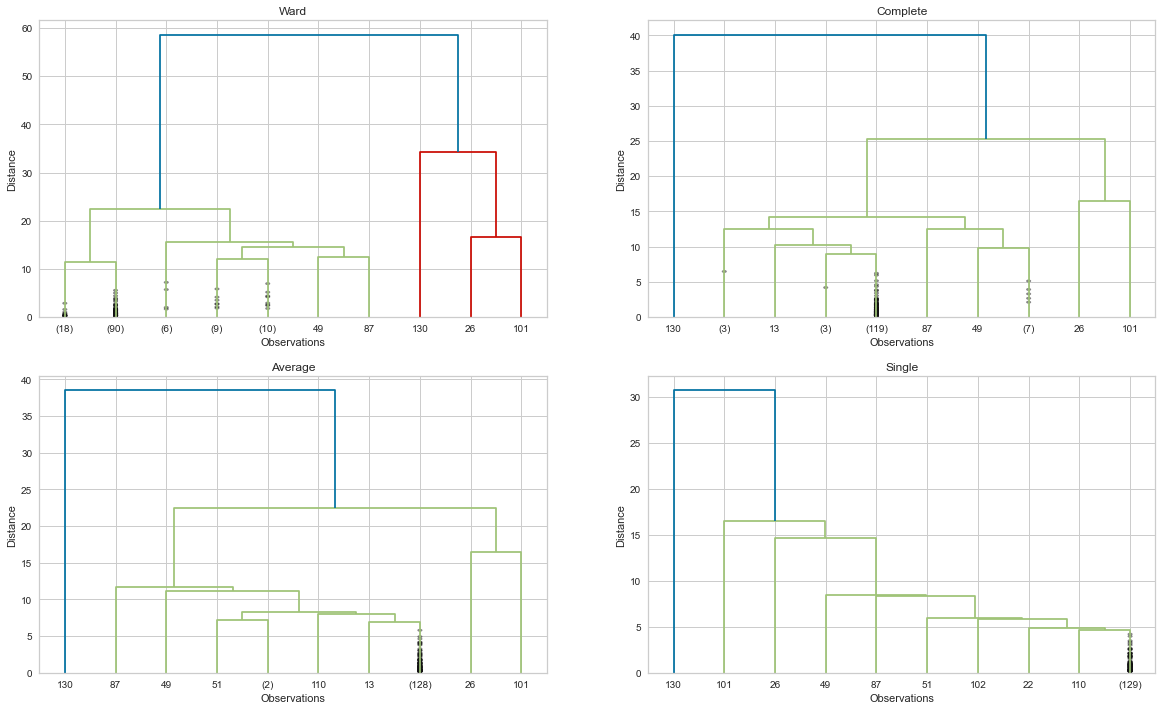

In [139]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Model Building and label visualisation

In [143]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [144]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.8678804190623872
Silhouette Score for 3 clusters: 0.45241656826732457
Silhouette Score for 4 clusters: 0.48321648566743175
Silhouette Score for 5 clusters: 0.30658930731008455
Silhouette Score for 6 clusters: 0.10496200135430707
Silhouette Score for 7 clusters: 0.10739537760292928
Silhouette Score for 8 clusters: -0.6786081321952682
Silhouette Score for 9 clusters: -0.6533034030643854
Silhouette Score for 10 clusters: -0.6244354634934995


In [149]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X)
X["cluster"] = clusters

In [150]:
X.cluster.value_counts()

0    135
1      2
2      1
Name: cluster, dtype: int64

### Evaluate 

In [155]:
X["country"] =df1.index
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Square Land Area value,cluster,country
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.136390,0,Afghanistan
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.273410,-0.177362,-0.317815,-0.187480,-0.486280,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.417556,0,Albania
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.888297,-0.177362,0.158908,-0.187480,0.342197,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,0.643550,0,Algeria
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.177362,-0.317815,-0.187480,-0.486280,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,0.131692,0,Angola
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.195012,-0.177362,-0.158908,0.251033,-0.486280,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,0.823329,0,Argentina
5,0.503622,-0.264333,-0.355421,-0.177957,-0.296014,-0.291058,-0.225866,-0.057987,-0.355350,-0.322338,-0.254050,-0.303888,-0.184274,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.187999,-0.276596,-0.230888,-0.352511,-0.302886,-0.280406,-0.282029,-0.417107,0,Armenia
6,-0.862800,0.061530,0.001895,-0.209809,0.084440,0.379972,-0.040643,-0.037363,-0.389126,0.104863,-0.309482,-0.423461,-0.325171,-0.202139,0.935180,0.158908,0.031776,0.839283,0.183492,0.648993,0.157175,-0.194181,0.140208,-0.237656,-0.173811,3.060460,0,Australia
7,-0.381982,-0.218712,-0.290059,-0.273513,-0.209053,-0.211868,-0.177631,-0.264231,-0.391112,-0.374463,-0.261344,-0.490720,-0.325171,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.158253,0.060472,-0.196964,-0.343927,-0.225374,-0.279397,-0.254456,-0.392697,0,Austria
8,-0.389942,-0.196716,-0.281344,-0.146105,-0.317754,-0.224371,-0.127466,-0.088924,-0.050707,-0.191933,-0.036701,-0.207980,0.010495,-0.323299,-0.177362,0.000000,-0.187480,-0.320585,-0.166826,-0.272793,-0.209375,0.122659,-0.241570,-0.116071,-0.242287,-0.391467,0,Azerbaijan
9,0.298651,-0.227673,-0.281344,-0.273513,-0.306884,-0.191028,-0.171843,-0.037363,-0.308991,-0.304716,-0.261344,-0.458336,-0.289946,-0.266282,-0.177362,-0.317815,-0.187480,-0.320585,-0.187552,-0.253918,-0.236680,-0.325421,-0.299416,-0.277481,-0.292594,-0.430177,0,Bahrain


In [157]:
X["power_class"] = X["cluster"].map({0:"low", 1:"Strong",2:"Super strong"})
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Square Land Area value,cluster,country,power class,power_class
0,-0.088171,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,-0.309482,-0.271503,-0.221570,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.029726,-0.280709,-0.204411,-0.352511,-0.322322,-0.280406,-0.132033,-0.136390,0,Afghanistan,low,low
1,0.646586,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,-0.309482,-0.490720,-0.325171,-0.273410,-0.177362,-0.317815,-0.187480,-0.486280,-0.204922,-0.277088,-0.236680,-0.342879,-0.305200,-0.276455,-0.284127,-0.417556,0,Albania,low,low
2,-0.754099,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,0.157309,-0.191788,0.329585,0.888297,-0.177362,0.158908,-0.187480,0.342197,-0.014815,-0.278851,-0.110084,0.433720,-0.174470,0.006007,-0.055840,0.643550,0,Algeria,low,low
3,-0.472112,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,-0.268637,-0.046058,-0.086889,-0.137996,-0.177362,-0.317815,-0.187480,-0.486280,-0.104277,-0.259389,-0.094363,0.650446,-0.286782,-0.086185,-0.228013,0.131692,0,Angola,low,low
4,-0.612954,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,-0.188408,-0.276485,-0.271298,-0.195012,-0.177362,-0.158908,0.251033,-0.486280,-0.146026,-0.165493,0.701623,-0.063905,-0.007876,-0.229110,-0.062512,0.823329,0,Argentina,low,low
5,0.503622,-0.264333,-0.355421,-0.177957,-0.296014,-0.291058,-0.225866,-0.057987,-0.355350,-0.322338,-0.254050,-0.303888,-0.184274,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.187999,-0.276596,-0.230888,-0.352511,-0.302886,-0.280406,-0.282029,-0.417107,0,Armenia,low,low
6,-0.862800,0.061530,0.001895,-0.209809,0.084440,0.379972,-0.040643,-0.037363,-0.389126,0.104863,-0.309482,-0.423461,-0.325171,-0.202139,0.935180,0.158908,0.031776,0.839283,0.183492,0.648993,0.157175,-0.194181,0.140208,-0.237656,-0.173811,3.060460,0,Australia,low,low
7,-0.381982,-0.218712,-0.290059,-0.273513,-0.209053,-0.211868,-0.177631,-0.264231,-0.391112,-0.374463,-0.261344,-0.490720,-0.325171,-0.544237,-0.177362,-0.317815,-0.187480,-0.486280,-0.158253,0.060472,-0.196964,-0.343927,-0.225374,-0.279397,-0.254456,-0.392697,0,Austria,low,low
8,-0.389942,-0.196716,-0.281344,-0.146105,-0.317754,-0.224371,-0.127466,-0.088924,-0.050707,-0.191933,-0.036701,-0.207980,0.010495,-0.323299,-0.177362,0.000000,-0.187480,-0.320585,-0.166826,-0.272793,-0.209375,0.122659,-0.241570,-0.116071,-0.242287,-0.391467,0,Azerbaijan,low,low
9,0.298651,-0.227673,-0.281344,-0.273513,-0.306884,-0.191028,-0.171843,-0.037363,-0.308991,-0.304716,-0.261344,-0.458336,-0.289946,-0.266282,-0.177362,-0.317815,-0.187480,-0.320585,-0.187552,-0.253918,-0.236680,-0.325421,-0.299416,-0.277481,-0.292594,-0.430177,0,Bahrain,low,low


In [158]:
X[X.power_class=="low"]["country"]

0                           Afghanistan
1                               Albania
2                               Algeria
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
17                               Brazil
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
22                               Canada
23             Central African Republic
24                                 Chad


In [159]:
X[X.power_class=="Strong"]["country"]

26      China
101    Russia
Name: country, dtype: object

In [160]:
X[X.power_class=="Super strong"]["country"]

130    United States
Name: country, dtype: object